<a href="https://colab.research.google.com/github/ShankarPoudel441/self-Sub-functions/blob/main/Create_mask_unet_01_mammogram.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import os
import tensorflow as tf
import pandas as pd
from tensorflow.keras import layers
from PIL import Image
from pathlib import Path
import subprocess
import shutil
import datetime

from typing import Tuple

!pip3 install varname
from varname import nameof

# !pip3 install pickle
import pickle
import cv2


from tqdm import tqdm
tqdm.pandas()

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
print("Num GPUs Available: ", len(tf.config.list_physical_devices('GPU')))

Num GPUs Available:  0


In [ ]:
def merge_images(list_of_images):
  if len(list_of_images) == 1:
    return Image.open(list_of_images[0])
  else:
    img=np.array(Image.open(list_of_images[0]))
    for i in range(len(list_of_images) -1):
      img_add=Image.open(list_of_images[i+1])
      img=img+img_add
    return Image.fromarray(img)

In [ ]:
to_save_path="/content/drive/MyDrive/CBIS-DDSM/Unet_mask/mass"
test_df_path='/content/drive/MyDrive/CBIS-DDSM/test_two_class_v2.csv'
train_df_path="/content/drive/MyDrive/CBIS-DDSM/train_two_class_v2.csv"

def create_image_mask_csv(to_save_path, ip_csv_path, test_or_train):
  df=pd.read_csv(ip_csv_path)


  image_mask = df.groupby("image_file")["mask_path"].apply(list).reset_index(name="list_of_masks")

  image_mask["no_of_masks"] = image_mask["list_of_masks"].apply(lambda x: len(x))

  image_mask["mask_destination"]=image_mask["image_file"].apply(lambda x: to_save_path+"/"+test_or_train+"/"+x.split("/")[6]+"_full_binary_mask.png")
  
  to_print=to_save_path+"/"+"Image_mask_"+str(test_or_train)+".csv"
  print(to_print)

  image_mask.to_csv(to_save_path+"/"+"Image_mask_"+str(test_or_train)+".csv")
  
  return image_mask



In [ ]:
image_mask_test=create_image_mask_csv(to_save_path,test_df_path,"test")
image_mask_test
image_mask_train=create_image_mask_csv(to_save_path,train_df_path,"train")
image_mask_train

/content/drive/MyDrive/CBIS-DDSM/Unet_mask/mass/Image_mask_test.csv
/content/drive/MyDrive/CBIS-DDSM/Unet_mask/mass/Image_mask_train.csv


,image_file,list_of_masks,no_of_masks,mask_destination
0,/content/drive/MyDrive/CBIS-DDSM/CBIS-DDSM/Mas...,[/content/drive/MyDrive/CBIS-DDSM/CBIS-DDSM/Ma...,1,/content/drive/MyDrive/CBIS-DDSM/Unet_mask/mas...
1,/content/drive/MyDrive/CBIS-DDSM/CBIS-DDSM/Mas...,[/content/drive/MyDrive/CBIS-DDSM/CBIS-DDSM/Ma...,1,/content/drive/MyDrive/CBIS-DDSM/Unet_mask/mas...
2,/content/drive/MyDrive/CBIS-DDSM/CBIS-DDSM/Mas...,[/content/drive/MyDrive/CBIS-DDSM/CBIS-DDSM/Ma...,1,/content/drive/MyDrive/CBIS-DDSM/Unet_mask/mas...
3,/content/drive/MyDrive/CBIS-DDSM/CBIS-DDSM/Mas...,[/content/drive/MyDrive/CBIS-DDSM/CBIS-DDSM/Ma...,1,/content/drive/MyDrive/CBIS-DDSM/Unet_mask/mas...
4,/content/drive/MyDrive/CBIS-DDSM/CBIS-DDSM/Mas...,[/content/drive/MyDrive/CBIS-DDSM/CBIS-DDSM/Ma...,1,/content/drive/MyDrive/CBIS-DDSM/Unet_mask/mas...
...,...,...,...,...
1141,/content/drive/MyDrive/CBIS-DDSM/CBIS-DDSM/Mas...,[/content/drive/MyDrive/CBIS-DDSM/CBIS-DDSM/Ma...,1,/content/drive/MyDrive/CBIS-DDSM/Unet_mask/mas...
1142,/content/drive/MyDrive/CBIS-DDSM/CBIS-DDSM/Mas...,[/content/drive/MyDrive/CBIS-DDSM/CBIS-DDSM/Ma...,1,/content/drive/MyDrive/CBIS-DDSM/Unet_mask/mas...
1143,/content/drive/MyDrive/CBIS-DDSM/CBIS-DDSM/Mas...,[/content/drive/MyDrive/CBIS-DDSM/CBIS-DDSM/Ma...,1,/content/drive/MyDrive/CBIS-DDSM/Unet_mask/mas...
1144,/content/drive/MyDrive/CBIS-DDSM/CBIS-DDSM/Mas...,[/content/drive/MyDrive/CBIS-DDSM/CBIS-DDSM/Ma...,1,/content/drive/MyDrive/CBIS-DDSM/Unet_mask/mas...


In [ ]:
image_mask_test["mask_destination"][0]

'/content/drive/MyDrive/CBIS-DDSM/Unet_mask/mass/test/Mass-Test_P_00016_LEFT_CC_full_binary_mask.png'

In [ ]:
def create_and_store_binary_mask(destination, list_of_masks):
  mask=merge_images(list_of_masks)
  try:
    mask.save(destination)
  except:
    print("not written", destination)
    return destination

def store_the_created_mask(df):
  df.progress_apply(lambda x: create_and_store_binary_mask(x["mask_destination"], x["list_of_masks"]), axis=1)

In [ ]:
# store_the_created_mask(image_mask_test)
# store_the_created_mask(image_mask_train)

100%|██████████| 1146/1146 [20:05<00:00,  1.05s/it]


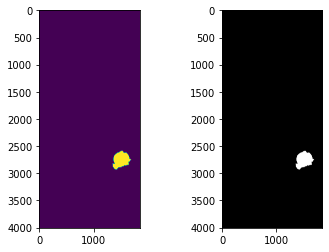

In [ ]:
img_mask=merge_images(image_mask_test["list_of_masks"][0])
#Show the image with matplotlib
figs,axes=plt.subplots(1,2)
axes[0].imshow(img_mask)

# image_mask_test.mask_destination[1]

img_mask=cv2.imread(image_mask_test["mask_destination"][0])
#Show the image with matplotlib
axes[1].imshow(img_mask)